## PROBLEM STATEMENT : 
- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:
    0. Airplanes
    1. Cars
    2. Birds
    3. Cats
    4. Deers
    5. Dogs
    6. Frogs
    7. Horses
    8. Ships
    9. Trucks
- Dataset consists of 60,000 32x32 color images, ie 6000 images per class. 
- We need to design a model to predict the label of these images correctly. 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle
import warnings
warnings.filterwarnings('ignore')
sns.set_style('dark')

## Reading Data

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


## Visualizing Data

In [4]:
data_dict = {0 : "Airplane",
             1 : "Car",
             2 : "Bird",
             3 : "Cat",
             4 : "Deer",
             5 : "Dog",
             6 : "Frog",
             7 : "Horse",
             8 : "Ship",
             9 : "Truck",
            }

In [5]:
def get_ten_random_images():
    """"
    function returns a dictionary of <label, idx> where idx is the random datapoint of class 'label'
    """"
    d = {}
    while len(d.keys()) < 10:
        idx = random.randint(0, len(y_train)-1)
        if y_train[idx][0] not in d.keys():
            d[y_train[idx][0]] = idx
    return d

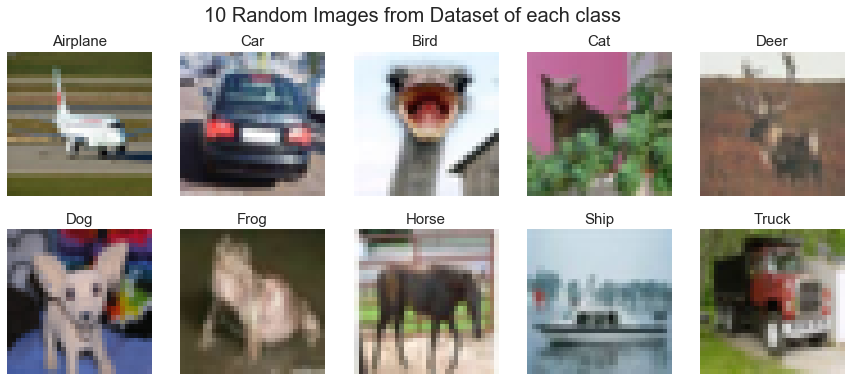

In [6]:
d = get_ten_random_images()
rows= 2
cols=5
fig,axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(1, rows*cols+1):
    axes[i-1].imshow(X_train[d[i-1]])
    axes[i-1].axis('off')
    axes[i-1].set_title(data_dict[i-1], fontsize=15)
fig.suptitle('10 Random Images from Dataset of each class', fontsize = 20)
plt.show()

## Data Modeling

In [27]:
import keras

In [28]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [117]:
## Mean shifting and variance centering 

In [61]:
mean = np.mean(X_train, axis = (0,1,2,3))
std = np.std(X_train, axis = (0,1,2,3))

In [63]:
X_train = (X_train-mean)/(std + 1e-7)
X_test = (X_test-mean)/(std + 1e-7)

In [118]:
## Converting target variable into categorical matrix

In [64]:
y_train_cat = keras.utils.to_categorical(y_train,10)
y_test_cat = keras.utils.to_categorical(y_test,10)

In [65]:
input_shape = X_train.shape[1:]

In [66]:
input_shape

(32, 32, 3)

## Model Training

In [67]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras import regularizers

In [68]:
weight_decay = 1e-4

In [102]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', input_shape = input_shape, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))



model.add(Flatten())

model.add(Dense(units = 10, activation = 'softmax'))
    


In [103]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
__________

In [104]:
model.compile(loss = 'categorical_crossentropy', optimizer= keras.optimizers.RMSprop(lr = 0.001, decay = 1e-6), metrics=['accuracy'])

In [105]:
epochs_hist = model.fit(X_train, y_train_cat, batch_size=64, epochs=50, validation_split=0.2, shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 21s 513us/step - loss: 1.8407 - acc: 0.4510 - val_loss: 1.1795 - val_acc: 0.6137
Epoch 2/50
40000/40000 [==============================] - 18s 456us/step - loss: 1.1651 - acc: 0.6306 - val_loss: 1.0870 - val_acc: 0.6489
Epoch 3/50
40000/40000 [==============================] - 18s 455us/step - loss: 0.9728 - acc: 0.6906 - val_loss: 0.8171 - val_acc: 0.7433
Epoch 4/50
40000/40000 [==============================] - 18s 456us/step - loss: 0.8635 - acc: 0.7277 - val_loss: 0.8037 - val_acc: 0.7520
Epoch 5/50
40000/40000 [==============================] - 18s 458us/step - loss: 0.7894 - acc: 0.7587 - val_loss: 0.7848 - val_acc: 0.7647
Epoch 6/50
40000/40000 [==============================] - 18s 459us/step - loss: 0.7301 - acc: 0.7811 - val_loss: 0.7439 - val_acc: 0.7826
Epoch 7/50
40000/40000 [==============================] - 19s 486us/step - loss: 0.6857 - acc: 0.7971 - val_loss: 0.

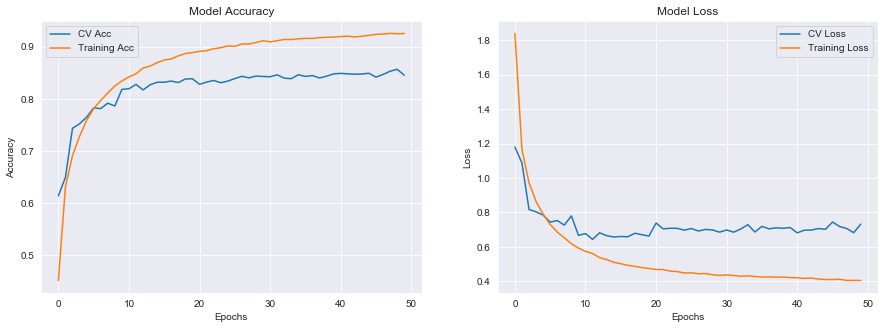

In [106]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_hist.history['val_acc'], label = 'CV Acc')
plt.plot(epochs_hist.history['acc'], label = 'Training Acc')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_hist.history['val_loss'], label = 'CV Loss')
plt.plot(epochs_hist.history['loss'], label = 'Training Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

## Model Evaluation

In [109]:
## evaluating using the test set

In [107]:
score = model.evaluate(X_test, y_test_cat, batch_size=128, verbose=1)

10000/10000 [==============================] - 1s 146us/step


In [116]:
print("Accuracy on Test Set : {:.2f}%".format(score[1]*100))

Accuracy on Test Set : 84.21%


### Notes:
- With simple normalization, the cv accuracy tends to be less than 10%. 
- With Standardization (z-score), the cv accuracy increases to over 90%.
- Next Step: Data augmentation to further increase the score. 